# Employee Performance Prediction Using HR Data

### Objective:
    ->Predict performance scores or future performance ratings for employees.
    ->Predict likelihood of retention or employee turnover.
    ->Gain insights into the key factors influencing employee performance or retention.

### Scope:
    1.Data Collection and Preprocessing
    2.Exploratory Data Analysis
    3.Feature Engineering
    4.Model development
    5.Predictions
    6.Insights

### Data loading

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv("hr_analytics.csv")
data.head(15)

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,...,3,80,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,...,1,80,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,...,4,80,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,...,4,80,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,...,4,80,0,0,0,3,0,0,0,0.0
5,RM973,18,18-25,No,Non-Travel,1124,Research & Development,1,3,Life Sciences,...,3,80,0,0,5,4,0,0,0,0.0
6,RM1154,18,18-25,Yes,Travel_Frequently,544,Sales,3,2,Medical,...,3,80,0,0,2,4,0,0,0,0.0
7,RM1312,18,18-25,No,Non-Travel,1431,Research & Development,14,3,Medical,...,3,80,0,0,4,1,0,0,0,0.0
8,RM128,19,18-25,Yes,Travel_Rarely,528,Sales,22,1,Marketing,...,4,80,0,0,2,2,0,0,0,0.0
9,RM150,19,18-25,No,Travel_Rarely,1181,Research & Development,3,1,Medical,...,4,80,0,1,3,3,1,0,0,0.0


### Initial Inspection

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmpID                     1480 non-null   object 
 1   Age                       1480 non-null   int64  
 2   AgeGroup                  1480 non-null   object 
 3   Attrition                 1480 non-null   object 
 4   BusinessTravel            1480 non-null   object 
 5   DailyRate                 1480 non-null   int64  
 6   Department                1480 non-null   object 
 7   DistanceFromHome          1480 non-null   int64  
 8   Education                 1480 non-null   int64  
 9   EducationField            1480 non-null   object 
 10  EmployeeCount             1480 non-null   int64  
 11  EmployeeNumber            1480 non-null   int64  
 12  EnvironmentSatisfaction   1480 non-null   int64  
 13  Gender                    1480 non-null   object 
 14  HourlyRa

### Data cleaning

In [5]:
#finding number of null values in each column
data.isnull().sum()

EmpID                        0
Age                          0
AgeGroup                     0
Attrition                    0
BusinessTravel               0
DailyRate                    0
Department                   0
DistanceFromHome             0
Education                    0
EducationField               0
EmployeeCount                0
EmployeeNumber               0
EnvironmentSatisfaction      0
Gender                       0
HourlyRate                   0
JobInvolvement               0
JobLevel                     0
JobRole                      0
JobSatisfaction              0
MaritalStatus                0
MonthlyIncome                0
SalarySlab                   0
MonthlyRate                  0
NumCompaniesWorked           0
Over18                       0
OverTime                     0
PercentSalaryHike            0
PerformanceRating            0
RelationshipSatisfaction     0
StandardHours                0
StockOptionLevel             0
TotalWorkingYears            0
Training

#### Median Imputation

In [6]:
#filling null values with median
data['YearsWithCurrManager'].fillna(data['YearsWithCurrManager'].median(),inplace=True)
data.isnull().sum()

EmpID                       0
Age                         0
AgeGroup                    0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
SalarySlab                  0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBa

### Removing irrevelant columns

In [7]:
data.drop(columns=['EmpID','EmployeeNumber','Over18','EmployeeCount','StandardHours'],inplace=True)

In [8]:
data.columns

Index(['Age', 'AgeGroup', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'SalarySlab', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

### Encoding Categorical features

In [9]:
from sklearn.preprocessing import LabelEncoder
categorical_cols=data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    le=LabelEncoder()
    data[col]=le.fit_transform(data[col])

In [10]:
data.dtypes

Age                           int64
AgeGroup                      int32
Attrition                     int32
BusinessTravel                int32
DailyRate                     int64
Department                    int32
DistanceFromHome              int64
Education                     int64
EducationField                int32
EnvironmentSatisfaction       int64
Gender                        int32
HourlyRate                    int64
JobInvolvement                int64
JobLevel                      int64
JobRole                       int32
JobSatisfaction               int64
MaritalStatus                 int32
MonthlyIncome                 int64
SalarySlab                    int32
MonthlyRate                   int64
NumCompaniesWorked            int64
OverTime                      int32
PercentSalaryHike             int64
PerformanceRating             int64
RelationshipSatisfaction      int64
StockOptionLevel              int64
TotalWorkingYears             int64
TrainingTimesLastYear       

In [11]:
data.head(15)

,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,18,0,1,3,230,1,3,3,1,3,...,3,3,0,0,2,3,0,0,0,0.0
1,18,0,0,3,812,2,10,3,3,4,...,3,1,0,0,2,3,0,0,0,0.0
2,18,0,1,2,1306,2,5,3,2,2,...,3,4,0,0,3,3,0,0,0,0.0
3,18,0,0,0,287,1,5,2,1,2,...,3,4,0,0,2,3,0,0,0,0.0
4,18,0,1,0,247,1,8,1,3,3,...,3,4,0,0,0,3,0,0,0,0.0
5,18,0,0,0,1124,1,1,3,1,4,...,3,3,0,0,5,4,0,0,0,0.0
6,18,0,1,2,544,2,3,2,3,2,...,3,3,0,0,2,4,0,0,0,0.0
7,18,0,0,0,1431,1,14,3,3,2,...,3,3,0,0,4,1,0,0,0,0.0
8,19,0,1,3,528,2,22,1,2,4,...,3,4,0,0,2,2,0,0,0,0.0
9,19,0,0,3,1181,1,3,1,3,2,...,3,4,0,1,3,3,1,0,0,0.0


## Exploratory Data Analysis

### Correlation Heatmap

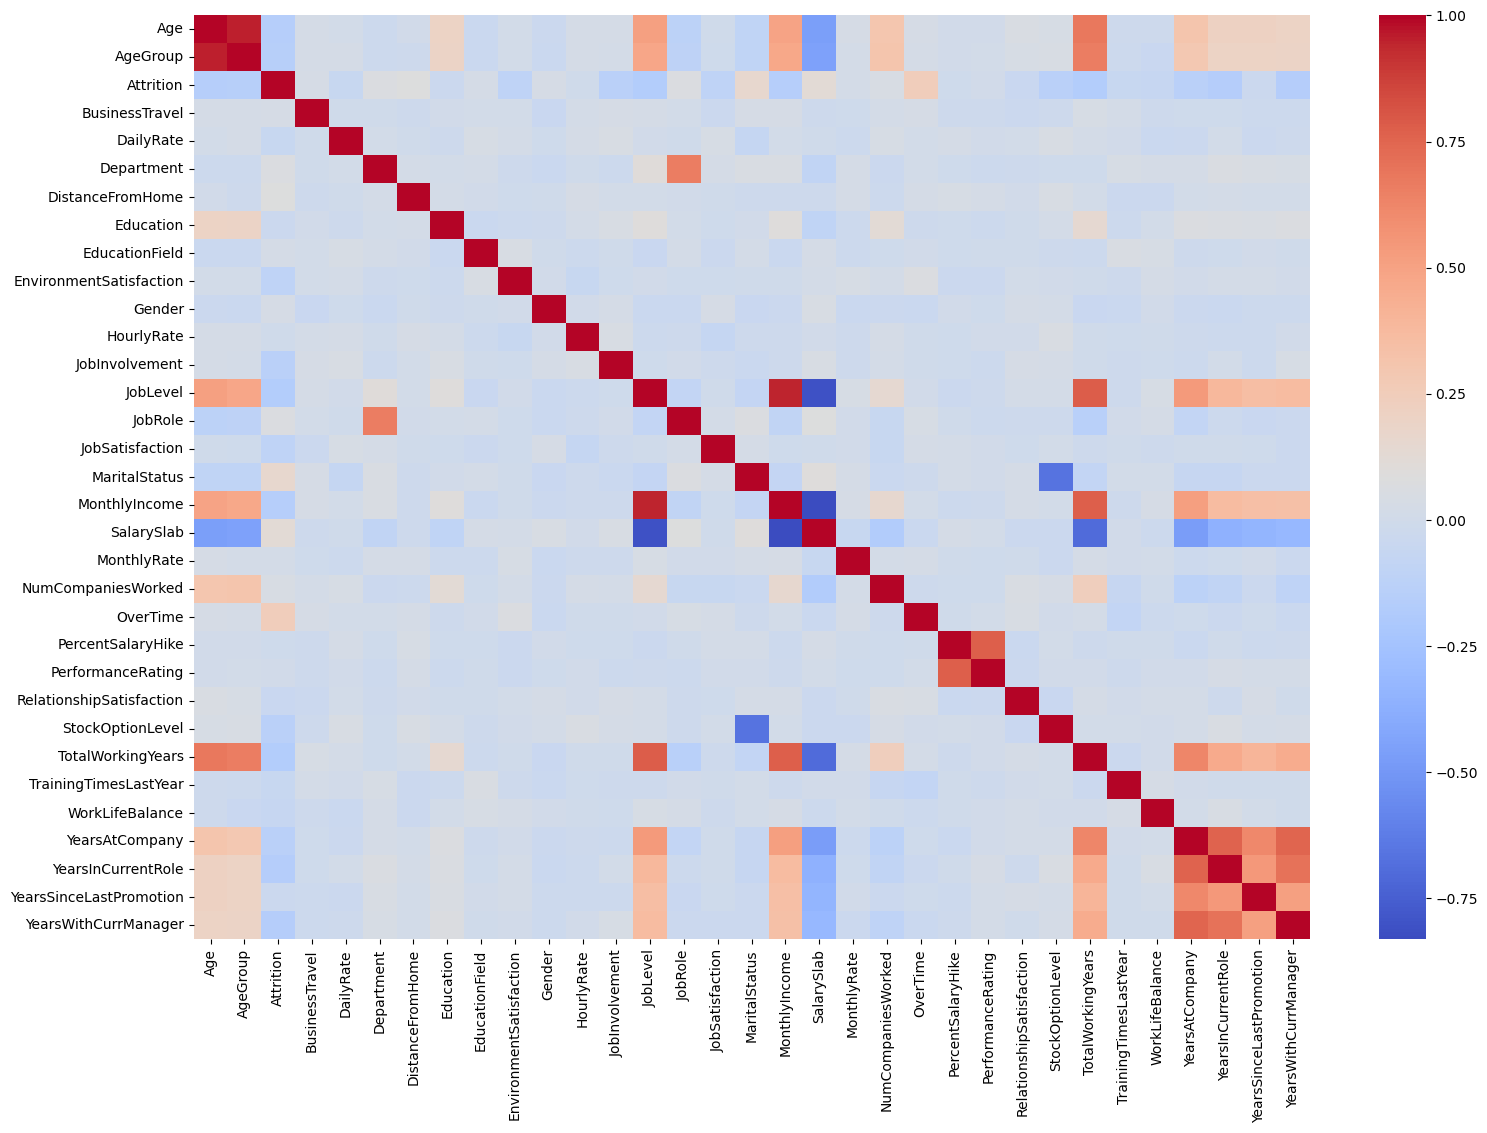

In [45]:
import seaborn as sns
plt.figure(figsize=(18, 12))
sns.heatmap(data.corr(), cmap="coolwarm", annot=False)
plt.show()

## Model development

### Predicting performance scores using RandomForestRegression

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [13]:
X_p=data.drop(columns=['PerformanceRating','Attrition'])
y_p=data['PerformanceRating']
X_train_p,X_test_p,y_train_p,y_test_p=train_test_split(X_p,y_p,test_size=0.2,random_state=42)

In [14]:
regressor=RandomForestRegressor(n_estimators=100,random_state=42)
regressor.fit(X_train_p,y_train_p)

RandomForestRegressor(random_state=42)

In [15]:
y_p_pred=regressor.predict(X_test_p)
y_p_pred

array([4., 3., 3., 4., 3., 3., 3., 4., 4., 4., 3., 3., 4., 3., 3., 3., 3.,
       3., 3., 3., 4., 3., 3., 4., 3., 3., 3., 4., 3., 3., 4., 4., 4., 3.,
       3., 3., 3., 3., 3., 3., 4., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 4., 3., 3., 3., 3., 3., 3., 3., 4., 3., 3., 4., 3., 3.,
       3., 3., 3., 3., 3., 4., 3., 3., 3., 4., 3., 4., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 4., 3., 4., 4., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 4., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 4., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 4., 4., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 4., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 4., 4., 3., 3., 3., 3., 4., 4., 3.,
       3., 4., 3., 4., 3., 3., 3., 3., 4., 4., 3., 3., 3., 3., 3., 3., 3.,
       4., 3., 3., 3., 3.

#### Testing and validation of model(1)

In [16]:
rmse=mean_squared_error(y_test_p,y_p_pred,squared=False)
rmse

0.0

### Actual vs Predicted

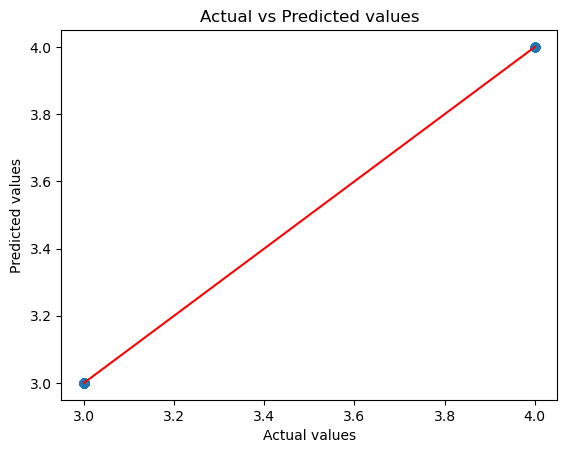

In [17]:
plt.scatter(y_test_p,y_p_pred,alpha=0.5)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values')
plt.plot([min(y_test_p),max(y_test_p)],[min(y_p_pred),max(y_p_pred)],color='red')
plt.show()

### Employee retention prediction using RandomForestClassification

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score
X_ret=data.drop(columns=['Attrition','PerformanceRating'])
y_ret=data['Attrition']

In [19]:
X_ret_train,X_ret_test,y_ret_train,y_ret_test=train_test_split(X_ret,y_ret,test_size=0.2,random_state=42)

In [20]:
classifier=RandomForestClassifier(n_estimators=100,random_state=42)
classifier.fit(X_ret_train,y_ret_train)

RandomForestClassifier(random_state=42)

In [21]:
y_ret_pred=classifier.predict(X_ret_test)
y_ret_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

#### Testing and validation of  model(2)

In [22]:
accuracy=accuracy_score(y_ret_test,y_ret_pred)
precision=precision_score(y_ret_test,y_ret_pred)
recall=recall_score(y_ret_test,y_ret_pred)
f1=f1_score(y_ret_test,y_ret_pred)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 score: {f1:.2f}")

Accuracy: 0.86
Precision: 0.88
Recall: 0.15
F1 score: 0.25


## Insights into the key factors influencing employee performance and retention.

### SalaryHike vs performance

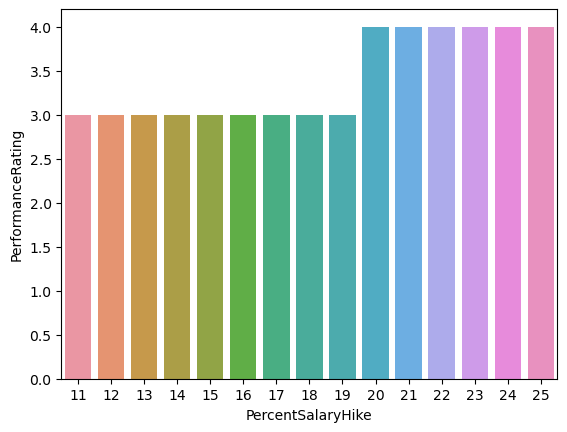

In [33]:
sns.barplot(x="PercentSalaryHike", y="PerformanceRating", data=data)
plt.show()

### Overtime vs Attrition

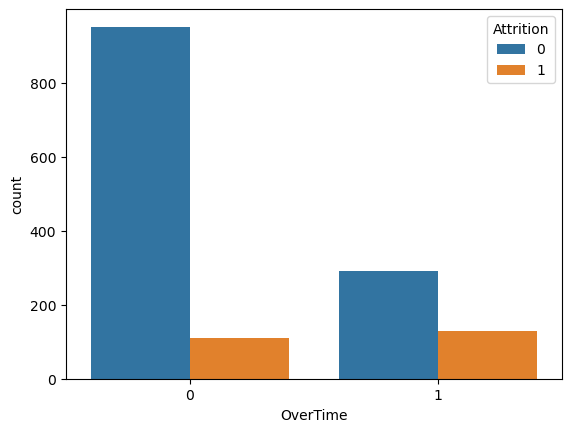

In [38]:
sns.countplot(x="OverTime", hue="Attrition", data=data)
plt.show()

### MaritalStatus vs Attrition

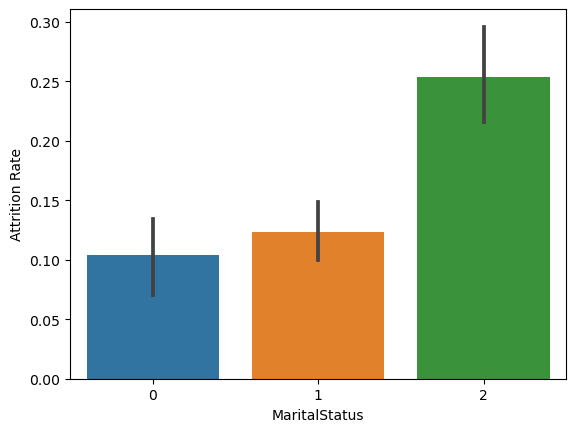

In [40]:
sns.barplot(x="MaritalStatus", y="Attrition", data=data)
plt.ylabel("Attrition Rate")
plt.show()